# <center> TWITTER ANALYTICS </center>

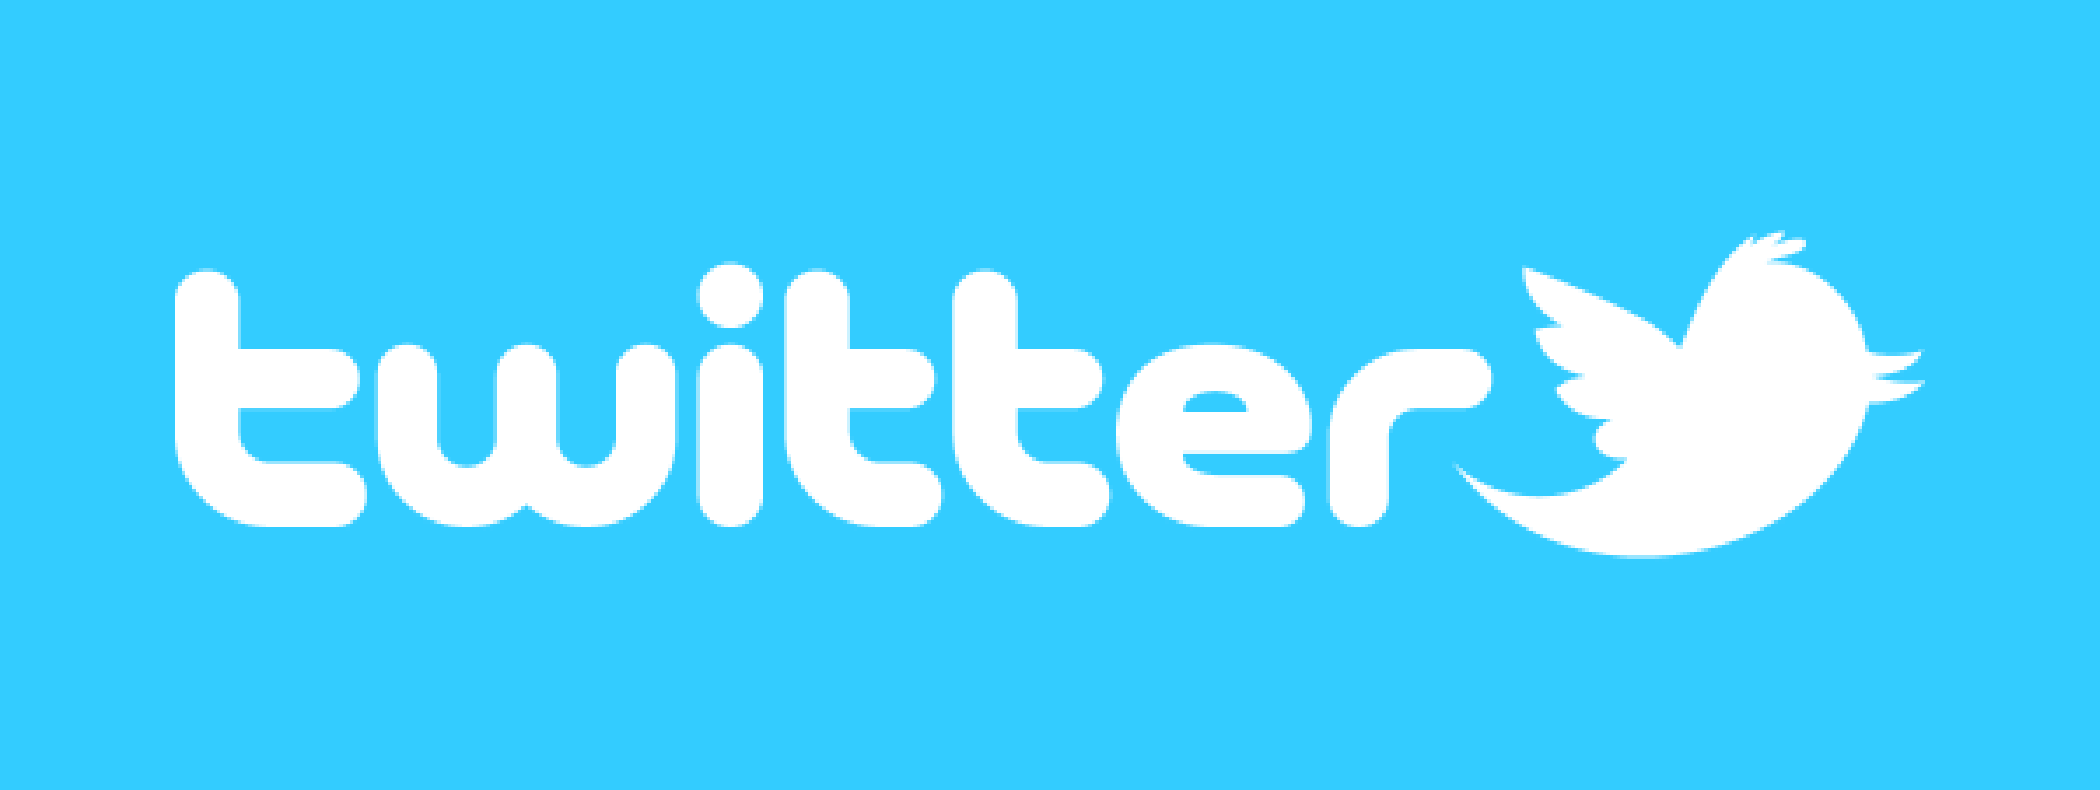


###  <center> Is Twitter a LEGITIMATE platform for Marketing Campaigns? </center>
 
### <center>We analyzed the Top 2 Valuable Sports Brands in 2019 using Twitter to understand the reach of Social Media </center>



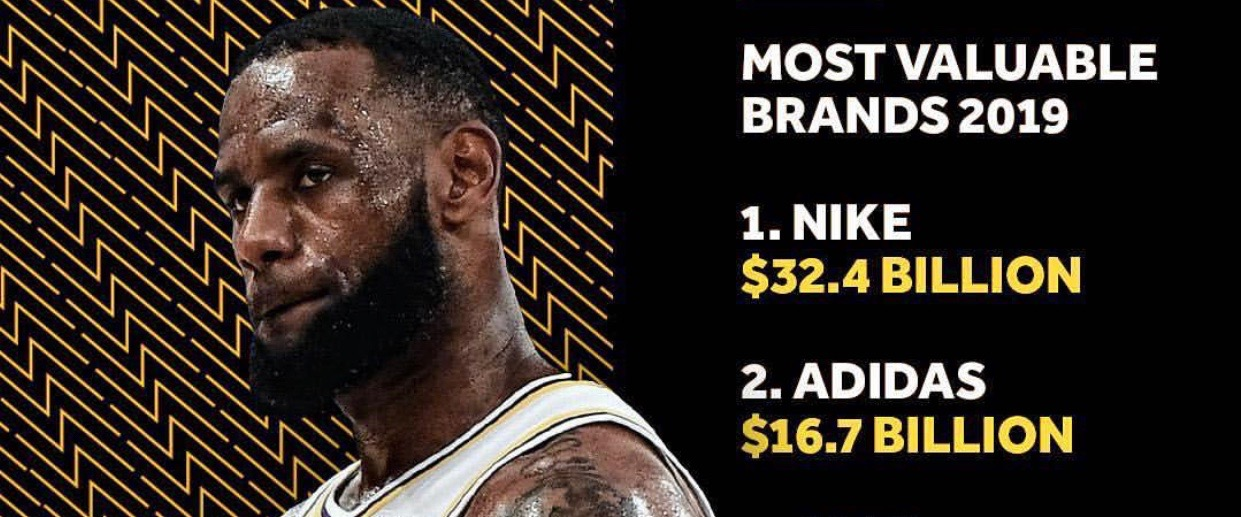

In [100]:
import pandas as pd
import matplotlib
import json
from twython import Twython
import twitter
import matplotlib.pyplot as plt
import numpy as np

In [101]:
# Load credentials from json file
with open("twitter_credentials.json", "r") as file:
   creds = json.load(file)

python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])


# <center> We Started by comparing Nike vs. Adidas </center>


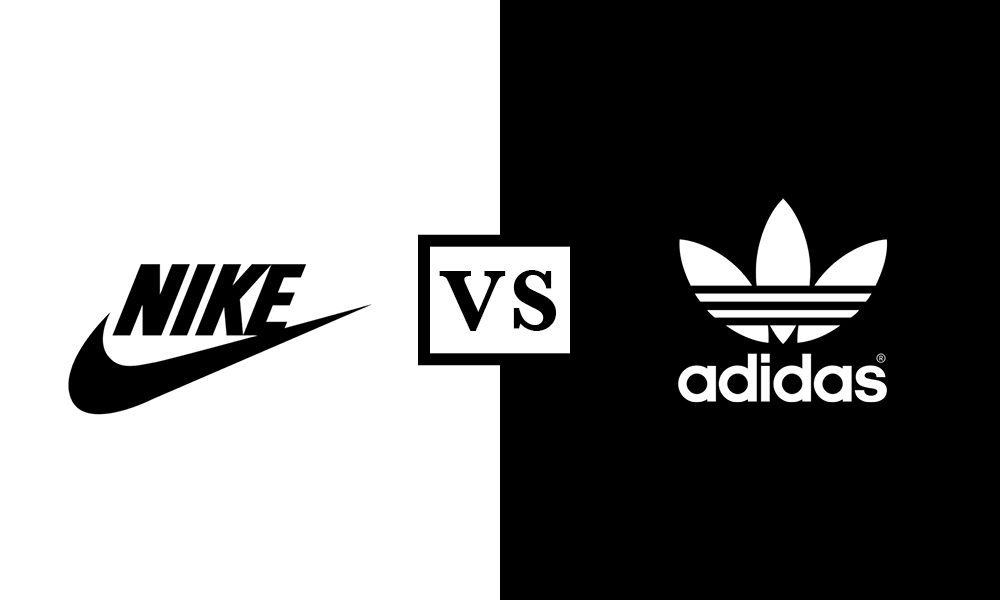

## <center> The following shows us the number of Followers and Tweets by each company </center>

In [102]:
ids = ["nike","adidas"]

output = python_tweets.lookup_user(screen_name=ids)

dict_1 = {'user': [], 'screen_name': [], 'location':[], 'description':[], 'followers_count':[], 'statuses_count':[]   }

for user in output:
   dict_1['user'].append(user['name'])
   dict_1['screen_name'].append(user['screen_name'])
   dict_1['location'].append(user['location'])
   dict_1['description'].append(user['description'])
   dict_1['followers_count'].append(user['followers_count'])
   dict_1['statuses_count'].append(user['statuses_count'])


df = pd.DataFrame(dict_1)
df.head()

,user,screen_name,location,description,followers_count,statuses_count
0,Nike,Nike,"Beaverton, Oregon",Just Do It.,7725605,35638
1,adidas,adidas,,From heavy traffic to the rugged trail. #Escap...,3570123,13756


Text(0, 0.5, 'Number of followers in million')

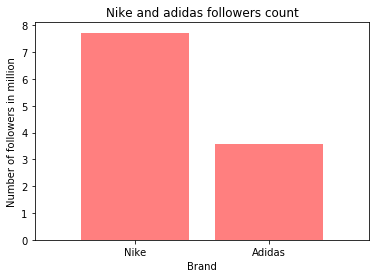

In [103]:
# Graph 1 Nike vs Adidas Followers
nikeFollowersCount = pd.DataFrame(dict_1)["followers_count"][0]/1000000
adidasFollowersCount = pd.DataFrame(dict_1)["followers_count"][1]/1000000
followersCount = [nikeFollowersCount,adidasFollowersCount]
x_axis = np.arange(len(followersCount))

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, followersCount, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nike", "Adidas"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Give our chart some labels and a tile
plt.title("Nike and adidas followers count")
plt.xlabel("Brand")
plt.ylabel("Number of followers in million")


Text(0, 0.5, 'Number of Tweets')

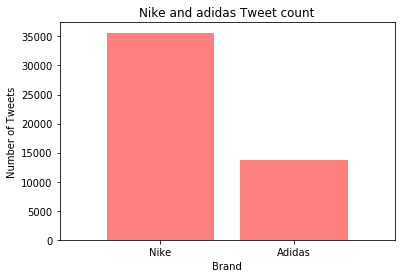

In [104]:
# Graph 2 Nike vs Adidas Status Count 
nikeStatusCount = pd.DataFrame(dict_1)["statuses_count"][0]
adidasStatusCount = pd.DataFrame(dict_1)["statuses_count"][1]
statusCount = [nikeStatusCount,adidasStatusCount]
x_axis = np.arange(len(statusCount))

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, statusCount, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nike", "Adidas"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Give our chart some labels and a tile
plt.title("Nike and adidas Tweet count")
plt.xlabel("Brand")
plt.ylabel("Number of Tweets")

# <center>Next we ran a search to identify the Top 15 most popular Tweets for each company</center>
# <center>NIKE</center>

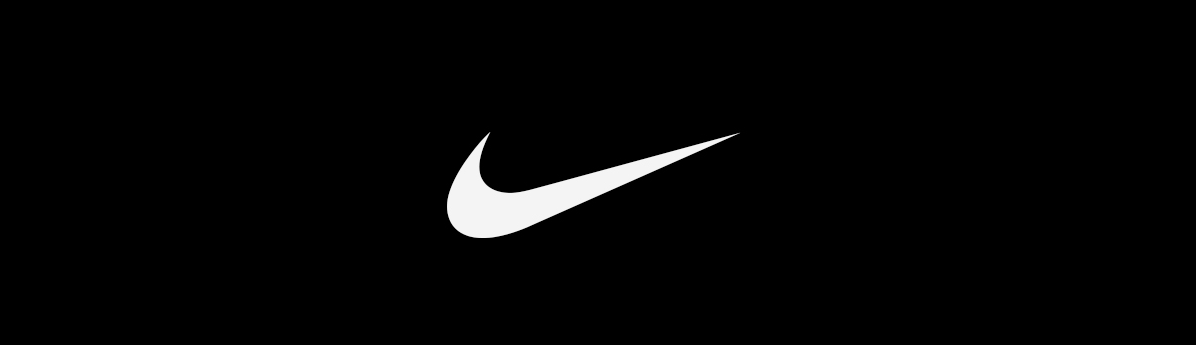

In [105]:
# Create our query
query = {'q': 'nike',
       'result_type': 'popular',
       'count': 15,
        'lang': 'en',
       }

# Search tweets
dict_2 = {'user': [], 'date': [], 'text': [], 'favorite_count': [], "followers_count":[],
        "user_favourites_count":[], "user_created_at": [] ,"retweet_count": [], "statuses_count":[], "hashtags":[] }
for status in python_tweets.search(**query)['statuses']:
   dict_2['user'].append(status['user']['screen_name'])
   dict_2['date'].append(status['created_at'])
   dict_2['text'].append(status['text'])
   dict_2['favorite_count'].append(status['favorite_count'])
   dict_2['followers_count'].append(status['user']['followers_count'])
   dict_2['user_favourites_count'].append(status['user']['favourites_count'])
   dict_2['statuses_count'].append(status['user']['statuses_count'])
   dict_2['user_created_at'].append(status['user']['created_at'])
   dict_2['hashtags'].append(status['entities']['hashtags']) 
   dict_2['retweet_count'].append(status['retweet_count'])


df = pd.DataFrame(dict_2)
df.sort_values(by='followers_count', ascending=True)
df.head(15)

,user,date,text,favorite_count,followers_count,user_favourites_count,user_created_at,retweet_count,statuses_count,hashtags
0,AustinDarbo,Tue Mar 05 10:41:04 +0000 2019,Nike have been advertising the AF1 every day s...,1950,28210,26333,Sun May 24 11:26:34 +0000 2009,816,245,[]
1,MPSIslington,Tue Mar 05 21:13:34 +0000 2019,Have you seen missing 14-year-old Holly Baldwi...,50,26285,3558,Fri Dec 02 09:14:09 +0000 2011,345,16122,[]
2,FCBarcelona,Tue Mar 05 17:19:08 +0000 2019,👀 Guess who visited Camp Nou lately…\n🏋️‍♂️🏋️...,3378,29193602,2006,Tue Dec 15 09:53:50 +0000 2009,287,100873,[]
3,ComplexSneakers,Mon Mar 04 19:00:01 +0000 2019,Nike used to turn down @virgilabloh. Now he's ...,678,405257,6469,Wed Jan 26 13:05:01 +0000 2011,170,67455,[]
4,Aaron_Doh,Mon Mar 04 22:32:34 +0000 2019,I just fought a turtle that was wearing Nike e...,4412,274667,2043,Mon Sep 09 03:32:30 +0000 2013,229,4503,[]
5,overtime,Tue Mar 05 00:15:44 +0000 2019,That was ANGRY 🤬 @Nike_Beast23 (via @UNCGMBBMa...,971,265868,13862,Sat Mar 08 17:26:42 +0000 2014,213,22421,[]
6,NerdAboutTown,Tue Mar 05 00:09:53 +0000 2019,Nike snapped. 😍😍😍 https://t.co/zoiw7zg9bx,881,32681,62792,Sun Nov 07 15:27:08 +0000 2010,197,153882,[]
7,brkicks,Tue Mar 05 04:27:26 +0000 2019,.@CaldwellPope wearing the Nike KD11 “Aunt Pea...,610,275281,383,Wed Dec 16 20:17:02 +0000 2015,74,13373,[]
8,BlairRIVALS,Mon Mar 04 15:03:30 +0000 2019,"Noah Fant - Nike Opening in High School\n6-4, ...",655,12343,0,Fri Jan 21 21:05:30 +0000 2011,109,24308,[]
9,darrenrovell,Tue Mar 05 18:19:45 +0000 2019,Other Notable Billionaires on @Forbes List:\n\...,370,2039889,2372,Fri Mar 13 23:11:21 +0000 2009,76,147734,[]


In [106]:
nike_followers= df['followers_count'].sum()

print(f'Nike Influencers  {nike_followers}')

nike_followers_status = df['statuses_count'].sum()
 
print(f'Nike Influencers Tweets {nike_followers_status}')

Nike Influencers  63243106
Nike Influencers Tweets 834233


# <center>ADIDAS</center>
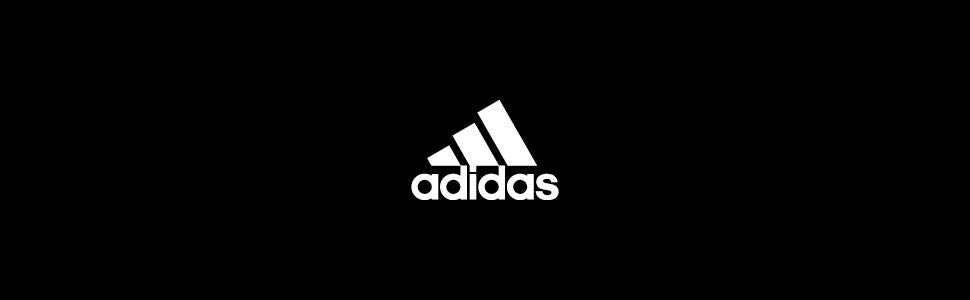

In [107]:
# Create our query
query = {'q': 'adidas',
       'result_type': 'popular',
       'count': 15,
        'lang': 'en',
       }

# Search tweets
dict_3 = {'user': [], 'date': [], 'text': [], 'favorite_count': [], "followers_count":[],
        "user_favourites_count":[], "user_created_at": [] ,"retweet_count": [], "statuses_count":[], "hashtags":[] }
for status in python_tweets.search(**query)['statuses']:
   dict_3['user'].append(status['user']['screen_name'])
   dict_3['date'].append(status['created_at'])
   dict_3['text'].append(status['text'])
   dict_3['favorite_count'].append(status['favorite_count'])
   dict_3['followers_count'].append(status['user']['followers_count'])
   dict_3['user_favourites_count'].append(status['user']['favourites_count'])
   dict_3['statuses_count'].append(status['user']['statuses_count'])
   dict_3['user_created_at'].append(status['user']['created_at'])
   dict_3['hashtags'].append(status['entities']['hashtags']) 
   dict_3['retweet_count'].append(status['retweet_count'])


df = pd.DataFrame(dict_3)
df.sort_values(by='followers_count', ascending=True)
df.head(15)

,user,date,text,favorite_count,followers_count,user_favourites_count,user_created_at,retweet_count,statuses_count,hashtags
0,adidasfootball,Tue Mar 05 09:03:45 +0000 2019,"Lights, camera, action. 🎬\nDavid Beckham &amp;...",1685,3465862,796,Thu Nov 25 15:31:32 +0000 2010,824,29810,"[{'text': 'Predator', 'indices': [88, 97]}]"
1,adidasoriginals,Tue Mar 05 19:00:02 +0000 2019,YEEZY BOOST 350 V2 HYPERSPACE. AVAILABLE MARCH...,2035,4021859,9288,Sun Feb 08 03:04:25 +0000 2009,371,17430,[]
2,FootyAccums,Tue Mar 05 09:33:38 +0000 2019,Adidas have released a limited edition of Davi...,3405,594338,109488,Wed Mar 09 18:11:42 +0000 2011,393,821312,[]
3,MPSIslington,Tue Mar 05 21:13:34 +0000 2019,Have you seen missing 14-year-old Holly Baldwi...,50,26285,3558,Fri Dec 02 09:14:09 +0000 2011,345,16122,[]
4,ProD_Soccer,Tue Mar 05 11:01:01 +0000 2019,Give that man a knighthood.\n\nThe Limited Edi...,1981,123502,4254,Mon Jul 11 14:04:18 +0000 2011,356,18548,[]
5,KimKardashian,Tue Mar 05 21:09:48 +0000 2019,Uncle Charlie!!!! @CharlieWilson #SundayServic...,3249,59938353,9,Thu Mar 19 19:21:56 +0000 2009,345,28931,"[{'text': 'SundayServiceOnATuesday', 'indices'..."
6,SportsCenter,Tue Mar 05 18:16:56 +0000 2019,A federal judge has sentenced three men convic...,571,35282909,1132,Tue Mar 24 15:28:02 +0000 2009,233,107980,[]
7,HoustonRockets,Mon Mar 04 21:12:13 +0000 2019,🚀 Step Back to '95 🚀\n\n🏀 @adidasHoops\n🔥 #Har...,1813,2771092,2136,Fri Jan 16 17:48:22 +0000 2009,377,45565,"[{'text': 'HardenVol3', 'indices': [39, 50]}]"
8,PPVSRB,Tue Mar 05 16:27:14 +0000 2019,Awaiting sentencing of three men convicted in ...,156,26587,532,Fri May 20 19:58:41 +0000 2011,126,5790,[]
9,brkicks,Tue Mar 05 15:48:24 +0000 2019,The Adidas Yeezy 350 V2 “Hyperspace” releases ...,607,275281,383,Wed Dec 16 20:17:02 +0000 2015,64,13373,[]


In [108]:
adidas_followers= df['followers_count'].sum()

print(f'Adidas Influencers  {adidas_followers}')

adidas_followers_status = df['statuses_count'].sum()
 
print(f'Adidas Influencers Status {adidas_followers_status}')

Adidas Influencers  127156338
Adidas Influencers Status 1415936


In [109]:
influencers = {'Nike Influencer Count' : nike_followers, 'Adidas Influencer Count': adidas_followers}

print(f'Influencers Totals  {influencers}')

influencers_status = {'Nike Influencer Status Count' : nike_followers_status, 'Adidas Influencer Status Total Count': adidas_followers_status}

print(f'Influencers Status Totals  {influencers_status}')

Influencers Totals  {'Nike Influencer Count': 63243106, 'Adidas Influencer Count': 127156338}
Influencers Status Totals  {'Nike Influencer Status Count': 834233, 'Adidas Influencer Status Total Count': 1415936}


Text(0, 0.5, 'Number of influencer followers in million')

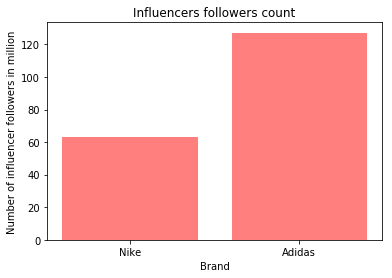

In [110]:
# TODO Nike Influencer Count Vs Adidas Influencer Count
nikeInfluencerCount = int(influencers["Nike Influencer Count"])/1000000
adidasInfluencerCount = int(influencers["Adidas Influencer Count"])/1000000

influencersCount = [nikeInfluencerCount,adidasInfluencerCount]

x_axis = np.arange(len(influencersCount))
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, influencersCount, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nike", "Adidas"])
# Sets the x limits of the current chart
#plt.xlim(-0.75, len(x_axis)-0.25)

# Give our chart some labels and a tile
plt.title("Influencers followers count")
plt.xlabel("Brand")
plt.ylabel("Number of influencer followers in million")

Text(0, 0.5, 'Number of Tweets ')

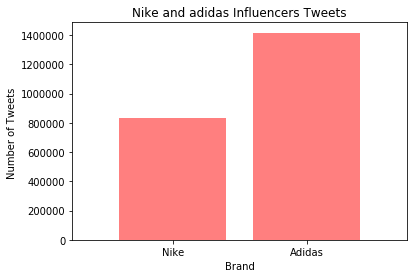

In [111]:
# Nike Influencers Status count vs Adidas Influencer Status Count

nikeInfluencerStatusCount = influencers_status["Nike Influencer Status Count"]
adidasInfluencerStatusCount = influencers_status["Adidas Influencer Status Total Count"]
statusCount = [nikeInfluencerStatusCount,adidasInfluencerStatusCount]
x_axis = np.arange(len(statusCount))
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, statusCount, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nike", "Adidas"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Give our chart some labels and a tile
plt.title("Nike and adidas Influencers Tweets")
plt.xlabel("Brand")
plt.ylabel("Number of Tweets ")


# <center>Recent Marketing Events</center>

# <center>2019 International Women's Day</center>


# <center>#InternationalWomensDay</center>

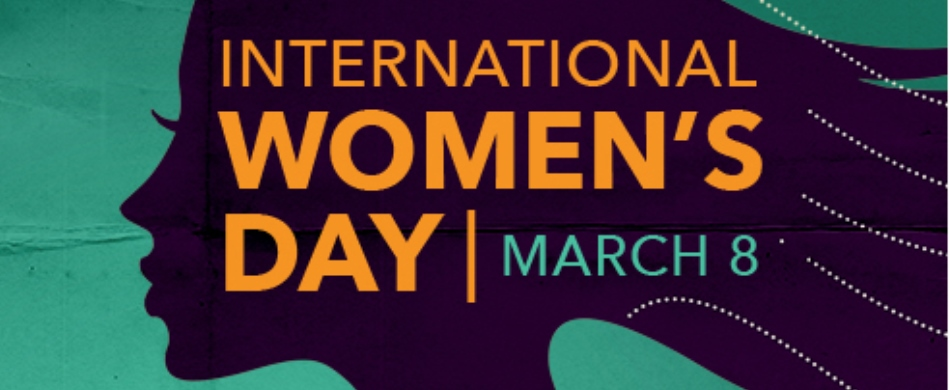

In [112]:
# Create our query
query = {'q': 'InternationalWomensDay',
       'result_type': 'popular',
       'count': 15,
        'lang': 'en',
       }

# Search tweets
dict_4 = {'user': [], 'date': [], 'text': [], 'favorite_count': [], "followers_count":[],
        "user_favourites_count":[], "user_created_at": [] ,"retweet_count": [], "statuses_count":[], "hashtags":[] }
for status in python_tweets.search(**query)['statuses']:
   dict_4['user'].append(status['user']['screen_name'])
   dict_4['date'].append(status['created_at'])
   dict_4['text'].append(status['text'])
   dict_4['favorite_count'].append(status['favorite_count'])
   dict_4['followers_count'].append(status['user']['followers_count'])
   dict_4['user_favourites_count'].append(status['user']['favourites_count'])
   dict_4['statuses_count'].append(status['user']['statuses_count'])
   dict_4['user_created_at'].append(status['user']['created_at'])
   dict_4['hashtags'].append(status['entities']['hashtags']) 
   dict_4['retweet_count'].append(status['retweet_count'])


df = pd.DataFrame(dict_4)
df.sort_values(by='followers_count', ascending=True)
df.head(15)

,user,date,text,favorite_count,followers_count,user_favourites_count,user_created_at,retweet_count,statuses_count,hashtags
0,AADaddario,Tue Mar 05 04:25:24 +0000 2019,"This #InternationalWomensDay, I’m joining @car...",834,756099,1234,Wed Nov 04 00:03:05 +0000 2009,94,2805,"[{'text': 'InternationalWomensDay', 'indices':..."
1,KatieHill4CA,Mon Mar 04 23:07:35 +0000 2019,As we approach #InternationalWomensDay - exact...,519,41536,2330,Tue Mar 07 21:28:29 +0000 2017,107,2739,"[{'text': 'InternationalWomensDay', 'indices':..."
2,RandA,Mon Mar 04 10:58:13 +0000 2019,"In the lead up to #InternationalWomensDay, we ...",307,34659,3159,Wed Mar 23 11:37:57 +0000 2011,110,3012,"[{'text': 'InternationalWomensDay', 'indices':..."
3,Siemens,Mon Mar 04 09:17:28 +0000 2019,How do you feel about the upcoming Internation...,1502,160861,2603,Fri May 06 15:23:39 +0000 2011,112,8571,"[{'text': 'BattleforBalance', 'indices': [85, ..."
4,trishdevlin,Tue Mar 05 16:09:49 +0000 2019,Women in east Belfast are coming together this...,87,6037,9577,Sun Jul 20 19:18:04 +0000 2008,44,18126,[]
5,ManCity,Mon Mar 04 10:00:00 +0000 2019,Hitting town today?\n\nKeep your eyes peeled f...,684,6678698,9024,Mon Apr 28 19:28:08 +0000 2008,55,118928,"[{'text': 'InternationalWomensDay', 'indices':..."
6,UKinSomalia,Mon Mar 04 06:42:58 +0000 2019,"In the lead up to the #InternationalWomensDay,...",246,170035,833,Tue Nov 15 10:36:43 +0000 2011,98,5448,"[{'text': 'InternationalWomensDay', 'indices':..."
7,codepink,Mon Mar 04 18:39:05 +0000 2019,Leading up to #InternationalWomensDay on Frida...,43,66201,24820,Tue Aug 12 13:44:56 +0000 2008,40,50542,"[{'text': 'InternationalWomensDay', 'indices':..."
8,PoliticsJOE_UK,Tue Mar 05 10:47:09 +0000 2019,In the stunt industry women’s roles are often ...,154,55009,835,Sat Mar 11 09:59:25 +0000 2017,62,2578,[]
9,UKinSomalia,Tue Mar 05 06:48:53 +0000 2019,“The opportunities for women in #Somalia are t...,128,170035,833,Tue Nov 15 10:36:43 +0000 2011,59,5448,"[{'text': 'Somalia', 'indices': [32, 40]}]"


In [113]:
womensinternationalday = df['followers_count'].sum()

print(f'Follower Count of People that Tweeted about Womens International Day  {womensinternationalday}')

womensinternationaldaytweets = df['statuses_count'].sum()
 
print(f'The Total number of Tweets by the the Top 15 Most Popular {womensinternationaldaytweets}')

Follower Count of People that Tweeted about Womens International Day  14444094
The Total number of Tweets by the the Top 15 Most Popular 406720


# <center>Nike's #DreamCrazier Campaign</center>

# <center>Reach and Status Count</center>

In [115]:
# Create our query
query = {'q': 'DREAM CRAZIER',
       'result_type': 'popular',
       'count': 15,
        'lang': 'en',
       }

# Search tweets
dict_5 = {'user': [], 'date': [], 'text': [], 'favorite_count': [], "followers_count":[],
        "user_favourites_count":[], "user_created_at": [] ,"retweet_count": [], "statuses_count":[], "hashtags":[] }
for status in python_tweets.search(**query)['statuses']:
   dict_5['user'].append(status['user']['screen_name'])
   dict_5['date'].append(status['created_at'])
   dict_5['text'].append(status['text'])
   dict_5['favorite_count'].append(status['favorite_count'])
   dict_5['followers_count'].append(status['user']['followers_count'])
   dict_5['user_favourites_count'].append(status['user']['favourites_count'])
   dict_5['statuses_count'].append(status['user']['statuses_count'])
   dict_5['user_created_at'].append(status['user']['created_at'])
   dict_5['hashtags'].append(status['entities']['hashtags']) 
   dict_5['retweet_count'].append(status['retweet_count'])


df = pd.DataFrame(dict_5)
df.sort_values(by='followers_count', ascending=True)
df.head(15)

,user,date,text,favorite_count,followers_count,user_favourites_count,user_created_at,retweet_count,statuses_count,hashtags
0,frntofficesport,Sun Feb 24 17:21:21 +0000 2019,JUST IN: A look at Nike’s “Dream Crazier” spot...,4782,28554,25783,Mon Jul 14 18:10:56 +0000 2014,1977,35347,"[{'text': 'Oscars', 'indices': [80, 87]}]"
1,CNN,Mon Feb 25 18:30:00 +0000 2019,"Nike's ""Dream Crazier"" ad celebrates female at...",642,41465166,1444,Fri Feb 09 00:35:02 +0000 2007,141,229943,[]
2,ComplexSneakers,Sun Feb 24 19:02:43 +0000 2019,Dream Crazier 🙌 https://t.co/m8IxndIgOp,500,405257,6469,Wed Jan 26 13:05:01 +0000 2011,175,67455,[]
3,BLACKGIRLSROCK,Sun Feb 24 22:25:23 +0000 2019,Serena Williams’ message to women: “Dream Craz...,254,193545,1350,Sat Jun 20 01:32:11 +0000 2009,88,5462,[]
4,ForTheWin,Sun Feb 24 18:38:04 +0000 2019,Dream Crazier. \n\nSerena Williams narrates Ni...,161,86354,519,Mon Jun 02 15:14:27 +0000 2008,99,122321,[]
5,ClioAwards,Mon Feb 25 03:51:27 +0000 2019,.@Nike takes the #Oscars by storm with 'Dream ...,173,39462,4231,Wed Feb 18 19:43:03 +0000 2009,57,18778,"[{'text': 'Oscars', 'indices': [17, 24]}]"
6,nikefootball,Sun Mar 03 00:39:55 +0000 2019,One crazy dreamer inspires the next. \n⠀ ⠀\nCe...,410,3481192,1595,Tue May 19 16:16:20 +0000 2009,46,45924,[]
7,Independent,Tue Feb 26 08:22:06 +0000 2019,Serena Williams narrates new Nike advert encou...,112,2671691,2,Sun Oct 26 00:00:29 +0000 2008,45,821924,[]
8,Complex,Sun Feb 24 19:40:09 +0000 2019,Nike unveils its female empowerment campaign '...,190,1569196,15016,Mon Feb 04 14:34:39 +0000 2008,43,316888,[]
9,theblaze,Thu Feb 28 16:47:30 +0000 2019,Here's a revised @glennbeck edition of Nike's ...,137,676304,2489,Sat Dec 01 22:23:57 +0000 2007,38,98820,[]


In [116]:
nikeinternationalday = df['followers_count'].sum()

print(f'Follower Count of People that Tweeted about Nike Dream Crazier Campaign  {nikeinternationalday}')

nikeinternationaldaytweets = df['statuses_count'].sum()
 
print(f'The Total number of Tweets by the the Top 15 Most Popular Nike Campaigners {nikeinternationaldaytweets}')

Follower Count of People that Tweeted about Nike Dream Crazier Campaign  62030489
The Total number of Tweets by the the Top 15 Most Popular Nike Campaigners 2296366


In [117]:
#Todo Total Nike Dream Crazier Campaign Follower Count and Tweets 
# nikeinternationalday
# nikeinternationaldaytweets

# <center>Adidas's #HereToCreate Campaign</center>

# <center>Reach and Status Count</center>

In [118]:
# Create our query
query = {'q': 'Here To Create',
       'result_type': 'popular',
       'count': 15,
        'lang': 'en',
       }

# Search tweets
dict_6 = {'user': [], 'date': [], 'text': [], 'favorite_count': [], "followers_count":[],
        "user_favourites_count":[], "user_created_at": [] ,"retweet_count": [], "statuses_count":[], "hashtags":[] }
for status in python_tweets.search(**query)['statuses']:
   dict_6['user'].append(status['user']['screen_name'])
   dict_6['date'].append(status['created_at'])
   dict_6['text'].append(status['text'])
   dict_6['favorite_count'].append(status['favorite_count'])
   dict_6['followers_count'].append(status['user']['followers_count'])
   dict_6['user_favourites_count'].append(status['user']['favourites_count'])
   dict_6['statuses_count'].append(status['user']['statuses_count'])
   dict_6['user_created_at'].append(status['user']['created_at'])
   dict_6['hashtags'].append(status['entities']['hashtags']) 
   dict_6['retweet_count'].append(status['retweet_count'])


df = pd.DataFrame(dict_6)
df.sort_values(by='followers_count', ascending=True)
df.head(15)

,user,date,text,favorite_count,followers_count,user_favourites_count,user_created_at,retweet_count,statuses_count,hashtags
0,BootsRiley,Mon Mar 04 10:26:35 +0000 2019,"Please know that, historically, EVERY TIME the...",2214,127941,22030,Thu Mar 12 21:37:28 +0000 2009,531,30203,[]
1,ThomasSanders,Mon Mar 04 23:02:55 +0000 2019,My dad is just out here encouraging me to keep...,8240,668729,301077,Tue Jun 19 16:21:01 +0000 2012,404,70323,[]
2,LMKMovieManiac,Tue Mar 05 11:20:06 +0000 2019,#Singam @Suriya_offl has valid words to say he...,243,235598,44247,Wed Dec 01 06:18:52 +0000 2010,76,79299,"[{'text': 'Singam', 'indices': [0, 7]}]"
3,michikokakutani,Tue Mar 05 01:35:52 +0000 2019,The sheer volume &amp;shamelessness of his lie...,139,107110,8575,Tue Sep 29 19:57:07 +0000 2009,79,71240,[]
4,jkenney,Tue Mar 05 01:37:02 +0000 2019,Getting Albertans back to work is job #1 of a ...,367,164019,29398,Sat Feb 21 23:05:42 +0000 2009,128,33503,[]
5,TED_ED,Mon Mar 04 23:00:14 +0000 2019,"All children deserve to learn in a safe, suppo...",94,470392,2885,Tue Mar 01 21:09:07 +0000 2011,41,8288,[]
6,BernJordanMP,Mon Mar 04 17:14:31 +0000 2019,"Today in Charlottetown, @JustinTrudeau announ...",80,6327,10234,Wed Aug 13 14:20:58 +0000 2014,36,4138,[]
7,Jeff_McLane,Tue Mar 05 18:13:00 +0000 2019,"Not surprise here, but the #Eagles have restru...",244,98163,582,Tue May 12 17:16:58 +0000 2009,46,55251,"[{'text': 'Eagles', 'indices': [27, 34]}]"
8,melissarfleming,Tue Mar 05 11:38:58 +0000 2019,Sign of the times spotted at the checkpoint en...,71,69181,6228,Mon Sep 01 07:40:01 +0000 2008,21,10686,"[{'text': 'Syria', 'indices': [53, 59]}]"
9,PMOIndia,Fri Mar 01 10:17:17 +0000 2019,My family is 130 crore Indians.\n\nI will live...,33293,28347287,0,Mon Jan 23 06:24:52 +0000 2012,7361,23005,[]


In [119]:
adidasinternationalday = df['followers_count'].sum()

print(f'Follower Count of People that Tweeted about Adidas Here To Create Campaign  {adidasinternationalday}')

adidasinternationaldaytweets = df['statuses_count'].sum()
 
print(f'The Total number of Tweets by the the Top 15 Most Popular Adidas Campaigners {adidasinternationaldaytweets}')

Follower Count of People that Tweeted about Adidas Here To Create Campaign  30620570
The Total number of Tweets by the the Top 15 Most Popular Adidas Campaigners 590460


In [ ]:
#Todo Total Adidas Here to Create Campaign Follower Count and Tweets 
# adidasinternationalday
# adidasinternationaldaytweets

In [120]:
intwomensdayfollowers = {'Womens Day Influencer Count' : womensinternationalday, 'Nike Influencer Count' : nikeinternationalday, 'Adidas Influencer Count': adidasinternationalday}

print(f'Influencers Totals  {intwomensdayfollowers}')

intwomensdayfollowerstweets = {'Womens Day Influencer Tweets Totals' : womensinternationaldaytweets,'Nike Influencer Tweets Totals' : nikeinternationaldaytweets, 'Adidas Influencer Tweets Count': adidasinternationaldaytweets}

print(f'Influencers Status Totals  {intwomensdayfollowerstweets}')

Influencers Totals  {'Womens Day Influencer Count': 14444094, 'Nike Influencer Count': 62030489, 'Adidas Influencer Count': 30620570}
Influencers Status Totals  {'Womens Day Influencer Tweets Totals': 406720, 'Nike Influencer Tweets Totals': 2296366, 'Adidas Influencer Tweets Count': 590460}


In [99]:
#Todo Graph All 3 
#All the Influencers 
#Graph 1 - totalpotential Reach of the Campaign 
#womensinternationalday , nikeinternationalday, adidasinternationalday

